# ***1. The problem statement*** ✅

In this notebook, we will try to answer the question that whether or not it will rain tomorrow in Australia. We implement Logistic Regression with Python and Scikit-Learn.

To answer the question, we build a classifier to predict whether or not it will rain tomorrow in Australia. We train a binary classification model using Logistic Regression. 

So, let's get started.


---



In [1]:
!pip install opendatasets --upgrade --quiet
!pip install scikit-learn --upgrade --quiet
!pip install numpy --quiet
!pip install pyarrow --quiet
!pip install plotly matplotlib seaborn --quiet

# ***2. Import libraries*** ✅

The first step in building the model is to import the necessary libraries






In [2]:
# Basic Libraries for Data organization, Statistical operations and Plotting

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

# To perform mean imputation
from sklearn.impute import SimpleImputer   
from collections import Counter

from sklearn.model_selection import train_test_split

# Library imbalanced-learn to deal with the data imbalance. To use SMOTE for oversampling
from imblearn.over_sampling import SMOTE

#for standardising each feature variable
from sklearn.preprocessing import StandardScaler

# Importing classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report, confusion_matrix,plot_confusion_matrix,roc_curve,auc,precision_recall_curve,f1_score

import warnings
warnings.filterwarnings("ignore")

# ***3. Importing Datasets*** ✅

{"username":"nehaguptaau","key":"0d303caae24366fb0df4c9f0292e6971"}







In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download(dataset_url)



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nehaguptaau
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 132MB/s]

In [4]:
import os
data_dir = './weather-dataset-rattle-package'

train_csv = data_dir + '/weatherAUS.csv'

os.listdir(data_dir)

['weatherAUS.csv']

## View dimensions of dataset

In [5]:
raw_df = pd.read_csv(train_csv)
raw_df 

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

The dataset contains over 145,000 rows and 23 columns. The dataset contains date, numeric and categorical columns. There is missing values present in the data.


Let's view the column names and try to understand what kind of variables is present in the data.

In [6]:
raw_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
#Listing columns with same datatype in one vector.

num_features = [column_name for column_name in raw_df.columns if raw_df[column_name].dtype == 'float64' ]
cat_features = [column_name for column_name in raw_df.columns if raw_df[column_name].dtype == 'object'or raw_df[column_name].dtype == "int64"]

print("Columns with Numerical datatypes- \n",(num_features))
print("\nColumns with Categorical datatypes- \n",(cat_features))

Columns with Numerical datatypes- 
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

Columns with Categorical datatypes- 
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']




---



# ***4. Exploratory data analysis*** ✅
*  We have imported the data.
*  Now, its time to explore the data to gain insights about it.



In [8]:
raw_df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

### Searching for missing values in each columns.

In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

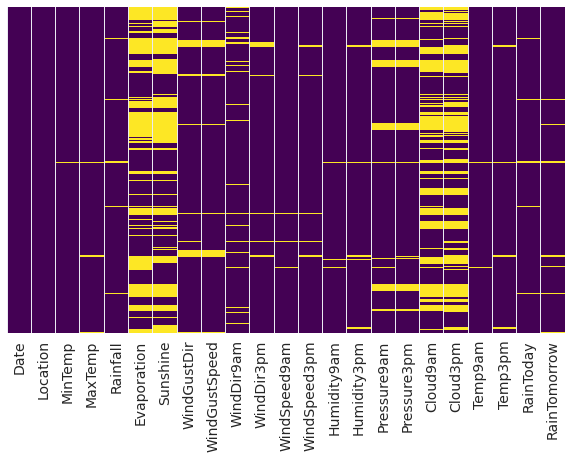

In [10]:
sns.heatmap(raw_df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Our dataset has a lot of missing values which needs to be treated.

In [11]:
# Features with missing values
miss = raw_df.isnull().sum().sort_values(ascending = False)
miss_per = (miss/len(raw_df))*100

# Percentage of missing values
pd.DataFrame({'Missing_Records': miss, 'Percentage of Missing_Data': miss_per.values})

Missing_Records  Percentage of Missing_Data
Sunshine                 69835                   48.009762
Evaporation              62790                   43.166506
Cloud3pm                 59358                   40.807095
Cloud9am                 55888                   38.421559
Pressure9am              15065                   10.356799
Pressure3pm              15028                   10.331363
WindDir9am               10566                    7.263853
WindGustDir              10326                    7.098859
WindGustSpeed            10263                    7.055548
Humidity3pm               4507                    3.098446
WindDir3pm                4228                    2.906641
Temp3pm                   3609                    2.481094
RainTomorrow              3267                    2.245978
Rainfall                  3261                    2.241853
RainToday                 3261                    2.241853
WindSpeed3pm              3062                    2.105046
Humidity9am               2654                    1.824557
Temp9am                   1767                    1.214767
WindSpeed9am              1767                    1.214767
MinTemp                   1485                    1.020899
MaxTemp                   1261                    0.866905
Location                     0                    0.000000
Date                         0                    0.000000



*   Because we are predicting rain, we will delete any records with missing values at the 'RainToday' and 'RainTomorrow' columns. 
*   We can see that approximately 40 percent of the 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm' columns have missing values. Filling these columns could result in outliers. Therefore, they will be removed from the dataset.





*   The remaining categorical features with missing values will be 
imputed with the most repeated value.

*   The remaining numerical features with missing values will be imputed with their mean values. (since mean is sensitive to outliers we will first remove outliers then fill the numerical features)

In [12]:
df=raw_df.dropna(subset=['RainToday', 'RainTomorrow'])
px.histogram(df, x='Location', title='Location vs. Rainy Days', color='RainToday')

Some places it rains more than the others. So,we to take consider or location also while modelling the data.

In [13]:
px.histogram(df, x='Temp3pm', title='Temperature at 3 pm vs. Rain Tomorrow', color='RainTomorrow')

In [14]:
###Mean temperature at 3 pm depending on rain tomorrow.
print("Mean temp when it rains tomorrow", df[["RainTomorrow","Temp3pm"]].groupby("RainTomorrow").mean())

Mean temp when it rains tomorrow                 Temp3pm
RainTomorrow           
No            22.405090
Yes           19.181358


When it rains tomorrow then temperature then temperature of today is slightly lower than when it didn't going to rain tomorrow.

In [15]:
px.histogram(df, x='RainTomorrow', color='RainToday', title='Rain Tomorrow vs. Rain Today')

We can see that there is class imbalance problem present here.

In [16]:
px.scatter(df.sample(2000), title='Min Temp. vs Max Temp.',x='MinTemp', y='MaxTemp', color='RainToday')

In [17]:
px.scatter(df.sample(2000), title='Temp (3 pm) vs. Humidity (3 pm)',x='Temp3pm',y='Humidity3pm',color='RainTomorrow')

# ***5. Feature Engineering*** ✅

## **Handling Missing Values by deleting columns.**

* Deleting null rows from 'RainToday' and 'RainTomorrow' columns.
* Removing 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm' columns from our datasets as  around 40% of the data is missing in these columns.

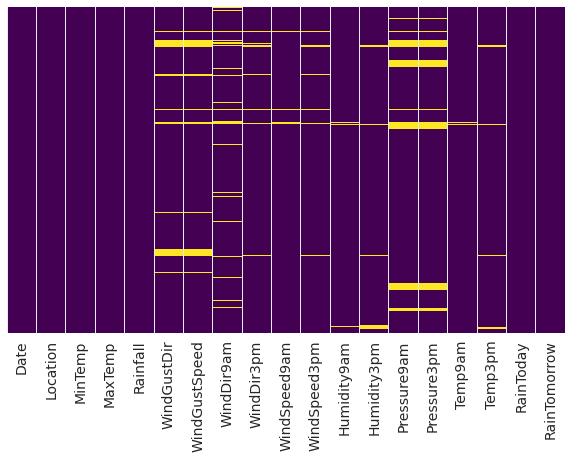

In [18]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
raw_df.drop(['Cloud9am','Cloud3pm',"Evaporation",'Sunshine'], axis=1,inplace=True)
sns.heatmap(raw_df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

We'll separated the date variable into two variable and then drop the date variable.

In [19]:
raw_df['Date'] = pd.to_datetime(raw_df['Date'])
raw_df['Year'] = raw_df['Date'].dt.year
raw_df['Month'] = raw_df['Date'].dt.month
raw_df.drop('Date',inplace= True,axis=1)
raw_df

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0        Albury     13.4     22.9       0.6           W           44.0   
1        Albury      7.4     25.1       0.0         WNW           44.0   
2        Albury     12.9     25.7       0.0         WSW           46.0   
3        Albury      9.2     28.0       0.0          NE           24.0   
4        Albury     17.5     32.3       1.0           W           41.0   
...         ...      ...      ...       ...         ...            ...   
145454    Uluru      3.5     21.8       0.0           E           31.0   
145455    Uluru      2.8     23.4       0.0           E           31.0   
145456    Uluru      3.6     25.3       0.0         NNW           22.0   
145457    Uluru      5.4     26.9       0.0           N           37.0   
145458    Uluru      7.8     27.0       0.0          SE           28.0   

       WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0               W        WNW          20.0          24.0         71.0   
1             NNW        WSW           4.0          22.0         44.0   
2               W        WSW          19.0          26.0         38.0   
3              SE          E          11.0           9.0         45.0   
4             ENE         NW           7.0          20.0         82.0   
...           ...        ...           ...           ...          ...   
145454        ESE          E          15.0          13.0         59.0   
145455         SE        ENE          13.0          11.0         51.0   
145456         SE          N          13.0           9.0         56.0   
145457         SE        WNW           9.0           9.0         53.0   
145458        SSE          N          13.0           7.0         51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday  \
0              22.0       1007.7       1007.1     16.9     21.8        No   
1              25.0       1010.6       1007.8     17.2     24.3        No   
2              30.0       1007.6       1008.7     21.0     23.2        No   
3              16.0       1017.6       1012.8     18.1     26.5        No   
4              33.0       1010.8       1006.0     17.8     29.7        No   
...             ...          ...          ...      ...      ...       ...   
145454         27.0       1024.7       1021.2      9.4     20.9        No   
145455         24.0       1024.6       1020.3     10.1     22.4        No   
145456         21.0       1023.5       1019.1     10.9     24.5        No   
145457         24.0       1021.0       1016.8     12.5     26.1        No   
145458         24.0       1019.4       1016.5     15.1     26.0        No   

       RainTomorrow  Year  Month  
0                No  2008     12  
1                No  2008     12  
2                No  2008     12  
3                No  2008     12  
4                No  2008     12  
...             ...   ...    ...  
145454           No  2017      6  
145455           No  2017      6  
145456           No  2017      6  
145457           No  2017      6  
145458           No  2017      6  

[140787 rows x 20 columns]

Let's check the count of "rain tomorrow" monthly and year wise.

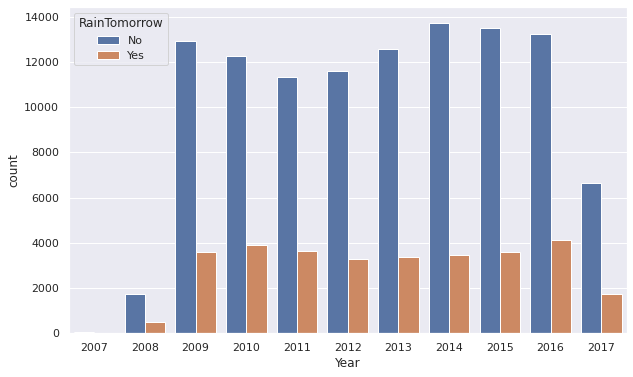

In [20]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Year", hue="RainTomorrow", data=raw_df)


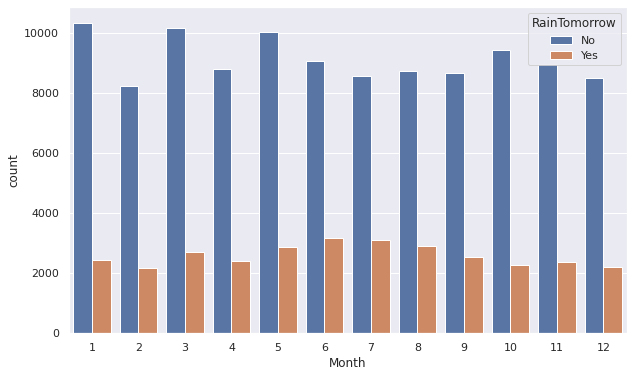

In [21]:
sns.countplot(x="Month", hue="RainTomorrow", data=raw_df)

In [22]:
#Listing columns with same datatype in one vector.

num_features = [column_name for column_name in raw_df.columns if raw_df[column_name].dtype == 'float64' ]
cat_features = [column_name for column_name in raw_df.columns if raw_df[column_name].dtype == 'object'or raw_df[column_name].dtype == "int64"]

print("Columns with Numerical datatypes- \n",(num_features))
print("\nColumns with Categorical datatypes- \n",(cat_features))

Columns with Numerical datatypes- 
 ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

Columns with Categorical datatypes- 
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month']


In [23]:
#List of number of different categorical values in each categorical columns.
print(raw_df[cat_features].nunique())

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
Year            11
Month           12
dtype: int64


##**Standardising numerical columns**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

raw_df[num_features]= scaler.fit_transform(raw_df[num_features])
raw_df[num_features].head()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0  0.189757 -0.047104 -0.206727       0.296762      0.676275      0.610232   
1 -0.747179  0.262125 -0.277606       0.296762     -1.124274      0.382909   
2  0.111679  0.346460 -0.277606       0.444058      0.563741      0.837555   
3 -0.466098  0.669744 -0.277606      -1.176193     -0.336533     -1.094689   
4  0.829996  1.274146 -0.159474       0.075819     -0.786671      0.155586   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  
0     0.113996    -1.415339    -1.401098    -1.159562 -0.013403  0.015397  
1    -1.302317    -1.271158    -0.992926    -1.060065  0.032779  0.375743  
2    -1.617054    -1.030857    -1.415173    -0.932140  0.617756  0.217191  
3    -1.249861    -1.703700    -0.007682    -0.349372  0.171326  0.692849  
4     0.691012    -0.886677    -0.964776    -1.315914  0.125144  1.154093

##**Creating boxplot for every numerical columns**

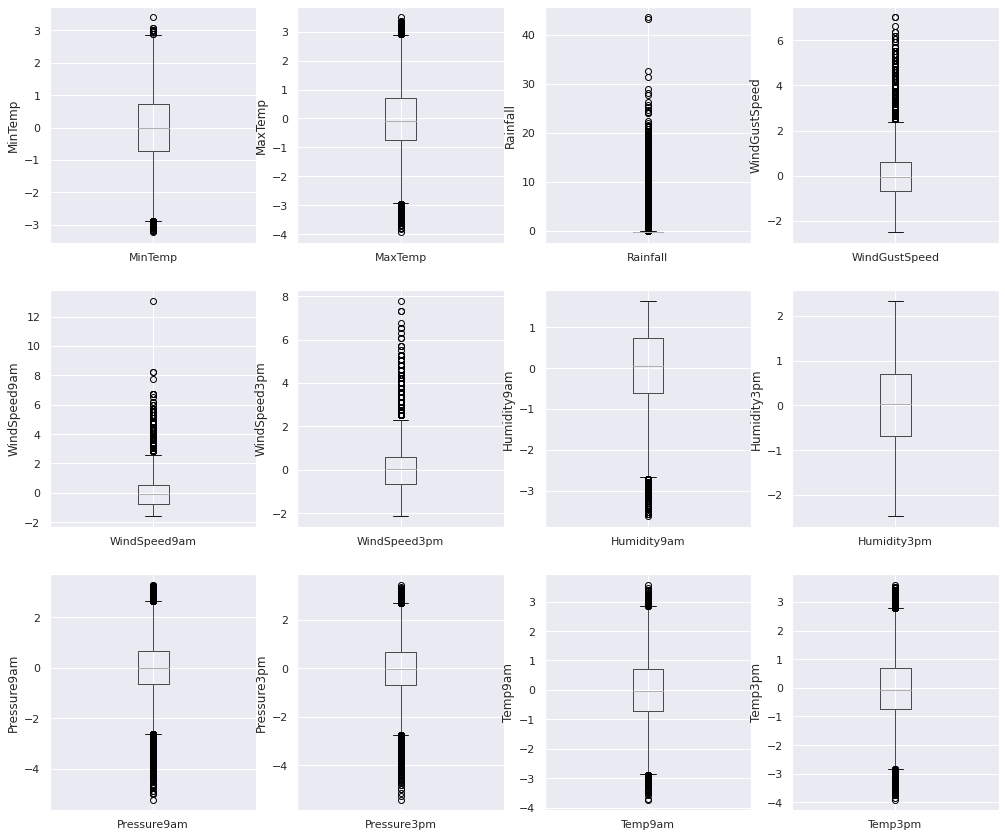

In [25]:
#Creating boxplot for every numerical columns in the raw_df
plt.figure(figsize=(17,20))
for i in range(len(num_features)):
  plt.subplot(4, 4, i+1)
  fig = raw_df.boxplot(column=num_features[i])
  fig.set_title('')
  fig.set_ylabel(num_features[i])

In [26]:
print("Count of rain tomorrow before removing outliers")
print(Counter(raw_df["RainTomorrow"]))

Count of rain tomorrow before removing outliers
Counter({'No': 109586, 'Yes': 31201})


## **Removing Outliers**

In [27]:
#Removing Outliers from the numerical columns of the dataset
Q1 = raw_df[num_features].quantile(0.25)
Q3 = raw_df[num_features].quantile(0.75)
IQR = Q3 - Q1

pd.concat([Q1, Q3, IQR], axis=1, keys= ['Q1', 'Q3', 'IQR'])

Q1        Q3       IQR
MinTemp       -0.715947  0.720687  1.436634
MaxTemp       -0.749897  0.711912  1.461809
Rainfall      -0.277606 -0.183101  0.094505
WindGustSpeed -0.660658  0.591353  1.252012
WindSpeed9am  -0.786671  0.563741  1.350412
WindSpeed3pm  -0.640043  0.610232  1.250275
Humidity9am   -0.620389  0.743468  1.363857
Humidity3pm   -0.694436  0.699310  1.393746
Pressure9am   -0.655128  0.667914  1.323042
Pressure3pm   -0.690504  0.674027  1.364531
Temp9am       -0.721532  0.710120  1.431653
Temp3pm       -0.734125  0.678435  1.412560

In [28]:
for i,features in enumerate(num_features):
  raw_df[features]=np.where(raw_df[features]>Q3[i]+1.5*IQR[i],Q3[i]+1.5*IQR[i],raw_df[features])
  raw_df[features]=np.where(raw_df[features]<Q1[i]-1.5*IQR[i],Q1[i]-1.5*IQR[i],raw_df[features])

In [29]:
raw_df[num_features].describe()

MinTemp        MaxTemp       Rainfall  WindGustSpeed  \
count  140319.000000  140480.000000  140787.000000  131682.000000   
mean        0.000027       0.000401      -0.220227      -0.014271   
std         0.999860       0.997879       0.093543       0.954742   
min        -2.870899      -2.942610      -0.277606      -2.501852   
25%        -0.715947      -0.749897      -0.277606      -0.660658   
50%        -0.028861      -0.089272      -0.277606      -0.071477   
75%         0.720687       0.711912      -0.183101       0.591353   
max         2.875639       2.904625      -0.041343       2.469370   

        WindSpeed9am   WindSpeed3pm    Humidity9am   Humidity3pm  \
count  139732.000000  138256.000000  139270.000000  1.372860e+05   
mean       -0.010052      -0.009993       0.002823  4.968613e-17   
std         0.966274       0.968561       0.991858  1.000004e+00   
min        -1.574411      -2.117641      -2.666174 -2.472663e+00   
25%        -0.786671      -0.640043      -0.620389 -6.944358e-01   
50%        -0.111465       0.041925       0.061540  2.646732e-02   
75%         0.563741       0.610232       0.743468  6.993102e-01   
max         2.589359       2.485644       1.635221  2.333357e+00   

         Pressure9am    Pressure3pm        Temp9am        Temp3pm  
count  127044.000000  127018.000000  140131.000000  138163.000000  
mean        0.003089       0.001995       0.000146       0.000339  
std         0.987676       0.991332       0.998926       0.996237  
min        -2.639691      -2.737301      -2.869011      -2.852965  
25%        -0.655128      -0.690504      -0.721532      -0.734125  
50%        -0.007682      -0.008239      -0.044191      -0.085501  
75%         0.667914       0.674027       0.710120       0.678435  
max         2.652477       2.720824       2.857599       2.797275

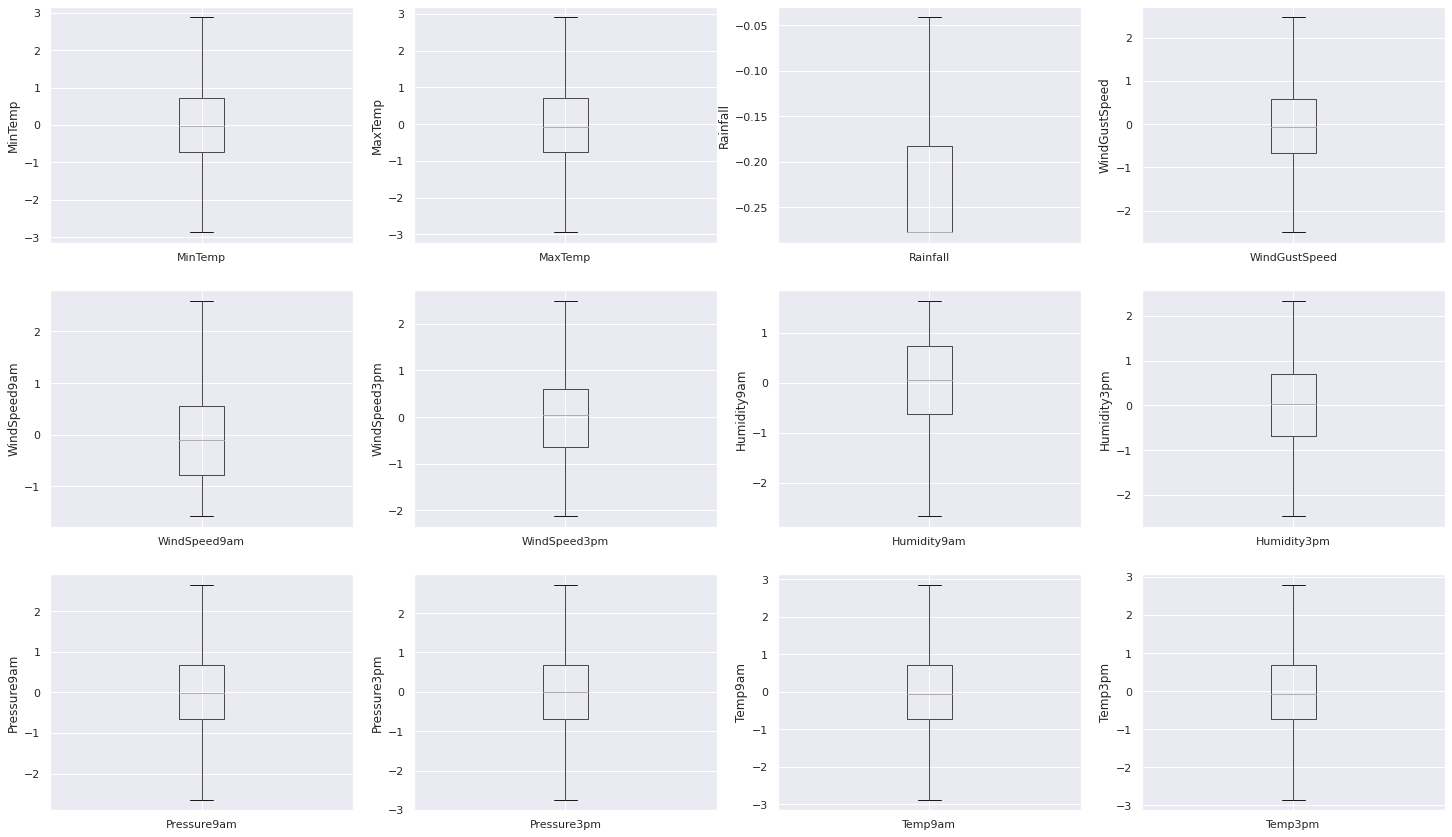

In [30]:
#Boxpplot after Replacing the Outliers with the max and min value from the numerical columns of the dataset
plt.figure(figsize=(25,20)) 
for i in range(len(num_features)): 
  plt.subplot(4, 4, i+1) 
  fig = raw_df.boxplot(column=num_features[i]) 
  fig.set_title('') 
  fig.set_ylabel(num_features[i])

In [31]:
print("Count of rain tomorrow after removing outliers")
print(Counter(raw_df["RainTomorrow"]))

Count of rain tomorrow after removing outliers
Counter({'No': 109586, 'Yes': 31201})


## **Handling missing values in numerical columns**


Now we'll impute the missing values in numerical features with their mean values.

Since mean is sensitive to outliers. So,  we first standardized the numericals columns above and then we're imputing missing values  using mean values.

In [32]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="mean") 
imputer=imputer.fit(raw_df[num_features])
raw_df[num_features]=imputer.transform(raw_df[num_features])
raw_df

Location   MinTemp   MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0        Albury  0.189757 -0.047104 -0.206727           W       0.296762   
1        Albury -0.747179  0.262125 -0.277606         WNW       0.296762   
2        Albury  0.111679  0.346460 -0.277606         WSW       0.444058   
3        Albury -0.466098  0.669744 -0.277606          NE      -1.176193   
4        Albury  0.829996  1.274146 -0.159474           W       0.075819   
...         ...       ...       ...       ...         ...            ...   
145454    Uluru -1.356187 -0.201718 -0.277606           E      -0.660658   
145455    Uluru -1.465496  0.023175 -0.277606           E      -0.660658   
145456    Uluru -1.340571  0.290236 -0.277606         NNW      -1.323488   
145457    Uluru -1.059490  0.515130 -0.277606           N      -0.218772   
145458    Uluru -0.684716  0.529186 -0.277606          SE      -0.881602   

       WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0               W        WNW      0.676275      0.610232     0.113996   
1             NNW        WSW     -1.124274      0.382909    -1.302317   
2               W        WSW      0.563741      0.837555    -1.617054   
3              SE          E     -0.336533     -1.094689    -1.249861   
4             ENE         NW     -0.786671      0.155586     0.691012   
...           ...        ...           ...           ...          ...   
145454        ESE          E      0.113604     -0.640043    -0.515477   
145455         SE        ENE     -0.111465     -0.867366    -0.935125   
145456         SE          N     -0.111465     -1.094689    -0.672845   
145457         SE        WNW     -0.561602     -1.094689    -0.830213   
145458        SSE          N     -0.111465     -1.322011    -0.935125   

        Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm RainToday  \
0         -1.415339    -1.401098    -1.159562 -0.013403  0.015397        No   
1         -1.271158    -0.992926    -1.060065  0.032779  0.375743        No   
2         -1.030857    -1.415173    -0.932140  0.617756  0.217191        No   
3         -1.703700    -0.007682    -0.349372  0.171326  0.692849        No   
4         -0.886677    -0.964776    -1.315914  0.125144  1.154093        No   
...             ...          ...          ...       ...       ...       ...   
145454    -1.175038     0.991637     0.844593 -1.167962 -0.114328        No   
145455    -1.319218     0.977562     0.716668 -1.060203  0.101880        No   
145456    -1.463399     0.822738     0.546102 -0.937050  0.404571        No   
145457    -1.319218     0.470865     0.219183 -0.690744  0.635193        No   
145458    -1.319218     0.245667     0.176542 -0.290497  0.620779        No   

       RainTomorrow  Year  Month  
0                No  2008     12  
1                No  2008     12  
2                No  2008     12  
3                No  2008     12  
4                No  2008     12  
...             ...   ...    ...  
145454           No  2017      6  
145455           No  2017      6  
145456           No  2017      6  
145457           No  2017      6  
145458           No  2017      6  

[140787 rows x 20 columns]

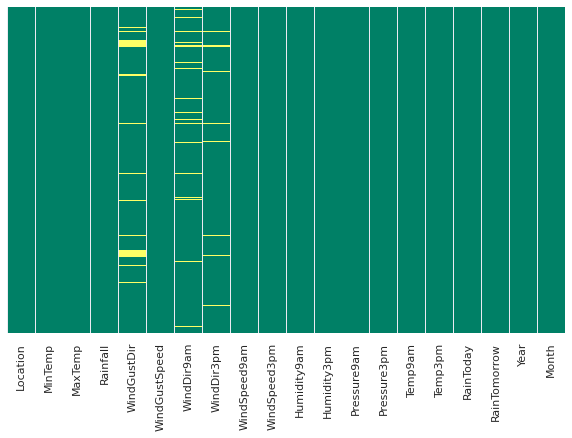

In [33]:
sns.heatmap(raw_df.isnull(),yticklabels=False,cbar=False,cmap="summer")
#Now our data has no missing values in any columns. 

## **Imputing missing values in categorical variables using most frequently occured category**

In [34]:
print(raw_df['WindGustDir'].mode())
print(raw_df['WindDir9am'].mode())
print(raw_df['WindDir3pm'].mode())

0    W
dtype: object
0    N
dtype: object
0    SE
dtype: object


In [35]:
raw_df['WindGustDir'].fillna('E', inplace=True)
raw_df['WindDir9am'].fillna('N', inplace=True)
raw_df['WindDir3pm'].fillna('SE', inplace=True)

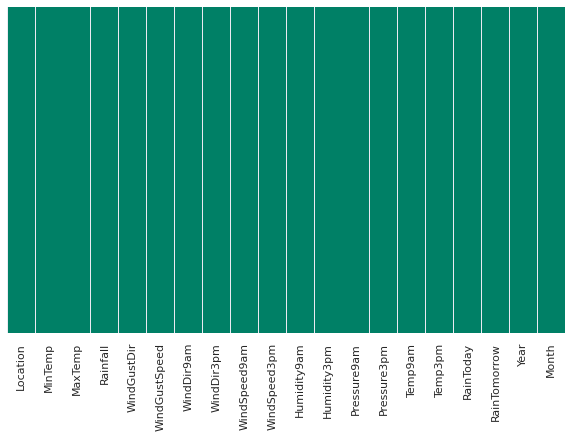

In [36]:
sns.heatmap(raw_df.isnull(),yticklabels=False,cbar=False,cmap="summer")
#Now our data has no missing values in any columns. 

## **Label Encoding**


In [37]:
from sklearn.preprocessing import LabelEncoder
def convert_categorial_features(feature):
    le = LabelEncoder()
    feature_encoded = le.fit_transform(feature)
    return feature_encoded

In [38]:
for feature in cat_features:
    raw_df[feature] = convert_categorial_features(raw_df[feature])

raw_df[cat_features]

Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  \
0              2           13          13          14          0   
1              2           14           6          15          0   
2              2           15          13          15          0   
3              2            4           9           0          0   
4              2           13           1           7          0   
...          ...          ...         ...         ...        ...   
145454        41            0           2           0          0   
145455        41            0           9           1          0   
145456        41            6           9           3          0   
145457        41            3           9          14          0   
145458        41            9          10           3          0   

        RainTomorrow  Year  Month  
0                  0     1     11  
1                  0     1     11  
2                  0     1     11  
3                  0     1     11  
4                  0     1     11  
...              ...   ...    ...  
145454             0    10      5  
145455             0    10      5  
145456             0    10      5  
145457             0    10      5  
145458             0    10      5  

[140787 rows x 8 columns]

In [39]:
raw_df.describe()

Location        MinTemp        MaxTemp       Rainfall  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean       23.720074       0.000027       0.000401      -0.220227   
std        14.233401       0.998197       0.996790       0.093543   
min         0.000000      -2.870899      -2.942610      -0.277606   
25%        11.000000      -0.715947      -0.749897      -0.277606   
50%        24.000000      -0.028861      -0.075216      -0.277606   
75%        36.000000       0.720687       0.697856      -0.183101   
max        48.000000       2.875639       2.904625      -0.041343   

         WindGustDir  WindGustSpeed     WindDir9am     WindDir3pm  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean        7.207526      -0.014271       7.006172       7.785740   
std         4.892712       0.923353       4.515248       4.547275   
min         0.000000      -2.501852       0.000000       0.000000   
25%         3.000000      -0.660658       3.000000       4.000000   
50%         8.000000      -0.071477       7.000000       8.000000   
75%        11.000000       0.444058      11.000000      12.000000   
max        15.000000       2.469370      15.000000      15.000000   

        WindSpeed9am   WindSpeed3pm    Humidity9am   Humidity3pm  \
count  140787.000000  140787.000000  140787.000000  1.407870e+05   
mean       -0.010052      -0.009993       0.002823  4.845057e-17   
std         0.962647       0.959816       0.986500  9.874916e-01   
min        -1.574411      -2.117641      -2.666174 -2.472663e+00   
25%        -0.786671      -0.640043      -0.620389 -6.944358e-01   
50%        -0.111465      -0.009993       0.061540  4.968613e-17   
75%         0.563741       0.610232       0.743468  6.512500e-01   
max         2.589359       2.485644       1.635221  2.333357e+00   

         Pressure9am    Pressure3pm        Temp9am        Temp3pm  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean        0.003089       0.001995       0.000146       0.000339   
std         0.938231       0.941609       0.996596       0.986909   
min        -2.639691      -2.737301      -2.869011      -2.852965   
25%        -0.584753      -0.605221      -0.721532      -0.719711   
50%         0.003089       0.001995      -0.028797      -0.056673   
75%         0.583465       0.588744       0.694726       0.664021   
max         2.652477       2.720824       2.857599       2.797275   

           RainToday   RainTomorrow           Year          Month  
count  140787.000000  140787.000000  140787.000000  140787.000000  
mean        0.223423       0.221618       5.757492       5.403482  
std         0.416541       0.415337       2.542272       3.426583  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       4.000000       2.000000  
50%         0.000000       0.000000       6.000000       5.000000  
75%         0.000000       0.000000       8.000000       8.000000  
max         1.000000       1.000000      10.000000      11.000000

In [40]:
#Creating a copy of pre-processed dataset
craw_df=raw_df.copy()

## **Check for Correlation between numerical variables**

In [41]:
#creating a temporary dataframe containing only numerical columns 
temp_df=craw_df[num_features]
temp_df

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.189757 -0.047104 -0.206727       0.296762      0.676275   
1      -0.747179  0.262125 -0.277606       0.296762     -1.124274   
2       0.111679  0.346460 -0.277606       0.444058      0.563741   
3      -0.466098  0.669744 -0.277606      -1.176193     -0.336533   
4       0.829996  1.274146 -0.159474       0.075819     -0.786671   
...          ...       ...       ...            ...           ...   
145454 -1.356187 -0.201718 -0.277606      -0.660658      0.113604   
145455 -1.465496  0.023175 -0.277606      -0.660658     -0.111465   
145456 -1.340571  0.290236 -0.277606      -1.323488     -0.111465   
145457 -1.059490  0.515130 -0.277606      -0.218772     -0.561602   
145458 -0.684716  0.529186 -0.277606      -0.881602     -0.111465   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.610232     0.113996    -1.415339    -1.401098    -1.159562   
1           0.382909    -1.302317    -1.271158    -0.992926    -1.060065   
2           0.837555    -1.617054    -1.030857    -1.415173    -0.932140   
3          -1.094689    -1.249861    -1.703700    -0.007682    -0.349372   
4           0.155586     0.691012    -0.886677    -0.964776    -1.315914   
...              ...          ...          ...          ...          ...   
145454     -0.640043    -0.515477    -1.175038     0.991637     0.844593   
145455     -0.867366    -0.935125    -1.319218     0.977562     0.716668   
145456     -1.094689    -0.672845    -1.463399     0.822738     0.546102   
145457     -1.094689    -0.830213    -1.319218     0.470865     0.219183   
145458     -1.322011    -0.935125    -1.319218     0.245667     0.176542   

         Temp9am   Temp3pm  
0      -0.013403  0.015397  
1       0.032779  0.375743  
2       0.617756  0.217191  
3       0.171326  0.692849  
4       0.125144  1.154093  
...          ...       ...  
145454 -1.167962 -0.114328  
145455 -1.060203  0.101880  
145456 -0.937050  0.404571  
145457 -0.690744  0.635193  
145458 -0.290497  0.620779  

[140787 rows x 12 columns]

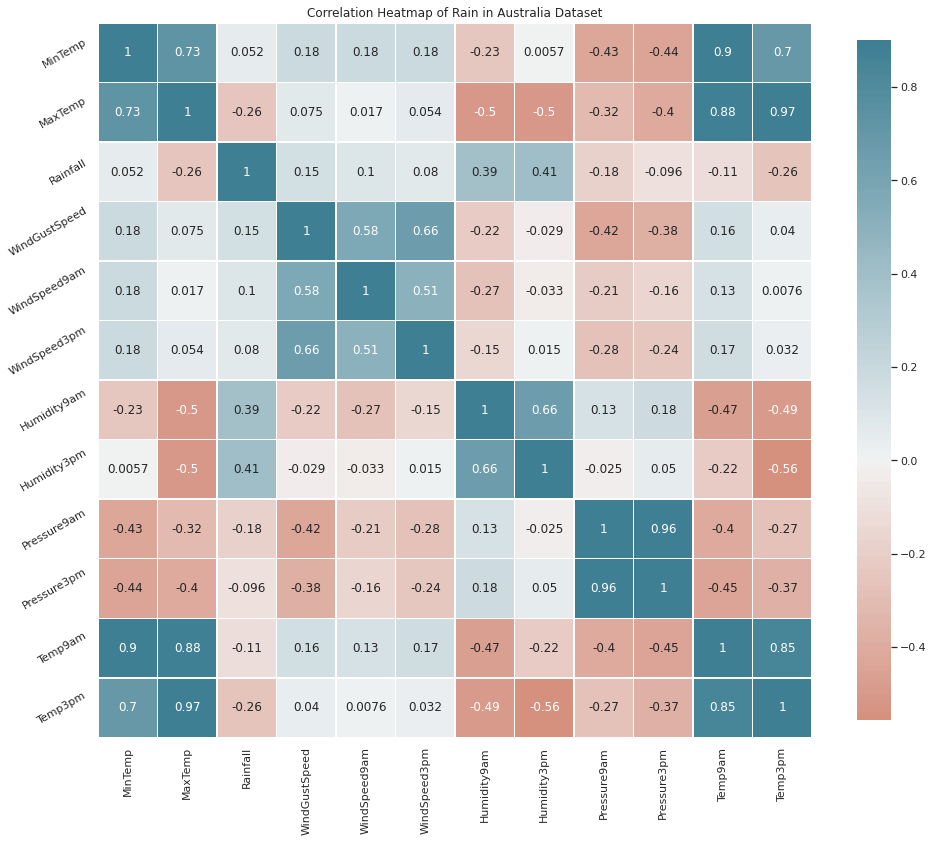

In [42]:
#correlation matrix
plt.figure(figsize=(16,25))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(temp_df.corr(), annot=True,vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},cmap=sns.diverging_palette(20, 220, n=200))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [43]:
for column1 in temp_df.columns:
  for column2 in range(temp_df.columns.get_loc(column1)+1,int((len(temp_df.columns)))):
    if temp_df[column1].corr(temp_df.iloc[:,column2])>=0.9 :
      print(f"{column1} and {temp_df.columns[column2]} are highly correlated")

MaxTemp and Temp3pm are highly correlated
Pressure9am and Pressure3pm are highly correlated


In [44]:
#merging cells with high correlation
morning_temp=(craw_df['MinTemp']+craw_df['Temp9am'])/2
noon_temp=(craw_df['MaxTemp']+craw_df['Temp3pm'])/2
new_pressure=(craw_df['Pressure9am']+craw_df['Pressure3pm'])/2

temp_df['Morning_temp']=morning_temp
temp_df['Noon_temp'] = noon_temp
temp_df['New_pressure'] = new_pressure
temp_df.drop(['MinTemp','Temp9am','MaxTemp','Temp3pm','Pressure9am','Pressure3pm'],inplace= True,axis=1)
temp_df

Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0      -0.206727       0.296762      0.676275      0.610232     0.113996   
1      -0.277606       0.296762     -1.124274      0.382909    -1.302317   
2      -0.277606       0.444058      0.563741      0.837555    -1.617054   
3      -0.277606      -1.176193     -0.336533     -1.094689    -1.249861   
4      -0.159474       0.075819     -0.786671      0.155586     0.691012   
...          ...            ...           ...           ...          ...   
145454 -0.277606      -0.660658      0.113604     -0.640043    -0.515477   
145455 -0.277606      -0.660658     -0.111465     -0.867366    -0.935125   
145456 -0.277606      -1.323488     -0.111465     -1.094689    -0.672845   
145457 -0.277606      -0.218772     -0.561602     -1.094689    -0.830213   
145458 -0.277606      -0.881602     -0.111465     -1.322011    -0.935125   

        Humidity3pm  Morning_temp  Noon_temp  New_pressure  
0         -1.415339      0.088177  -0.015854     -1.280330  
1         -1.271158     -0.357200   0.318934     -1.026495  
2         -1.030857      0.364717   0.281825     -1.173657  
3         -1.703700     -0.147386   0.681297     -0.178527  
4         -0.886677      0.477570   1.214119     -1.140345  
...             ...           ...        ...           ...  
145454    -1.175038     -1.262074  -0.158023      0.918115  
145455    -1.319218     -1.262849   0.062528      0.847115  
145456    -1.463399     -1.138811   0.347404      0.684420  
145457    -1.319218     -0.875117   0.575162      0.345024  
145458    -1.319218     -0.487607   0.574983      0.211104  

[140787 rows x 9 columns]

In [45]:
craw_df['Morning_temp']=morning_temp
craw_df['Noon_temp'] = noon_temp
craw_df['New_pressure'] = new_pressure
craw_df.drop(['MinTemp','Temp9am','MaxTemp','Temp3pm','Pressure9am','Pressure3pm'],inplace= True,axis=1)
craw_df

Location  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
0              2 -0.206727           13       0.296762          13   
1              2 -0.277606           14       0.296762           6   
2              2 -0.277606           15       0.444058          13   
3              2 -0.277606            4      -1.176193           9   
4              2 -0.159474           13       0.075819           1   
...          ...       ...          ...            ...         ...   
145454        41 -0.277606            0      -0.660658           2   
145455        41 -0.277606            0      -0.660658           9   
145456        41 -0.277606            6      -1.323488           9   
145457        41 -0.277606            3      -0.218772           9   
145458        41 -0.277606            9      -0.881602          10   

        WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0               14      0.676275      0.610232     0.113996    -1.415339   
1               15     -1.124274      0.382909    -1.302317    -1.271158   
2               15      0.563741      0.837555    -1.617054    -1.030857   
3                0     -0.336533     -1.094689    -1.249861    -1.703700   
4                7     -0.786671      0.155586     0.691012    -0.886677   
...            ...           ...           ...          ...          ...   
145454           0      0.113604     -0.640043    -0.515477    -1.175038   
145455           1     -0.111465     -0.867366    -0.935125    -1.319218   
145456           3     -0.111465     -1.094689    -0.672845    -1.463399   
145457          14     -0.561602     -1.094689    -0.830213    -1.319218   
145458           3     -0.111465     -1.322011    -0.935125    -1.319218   

        RainToday  RainTomorrow  Year  Month  Morning_temp  Noon_temp  \
0               0             0     1     11      0.088177  -0.015854   
1               0             0     1     11     -0.357200   0.318934   
2               0             0     1     11      0.364717   0.281825   
3               0             0     1     11     -0.147386   0.681297   
4               0             0     1     11      0.477570   1.214119   
...           ...           ...   ...    ...           ...        ...   
145454          0             0    10      5     -1.262074  -0.158023   
145455          0             0    10      5     -1.262849   0.062528   
145456          0             0    10      5     -1.138811   0.347404   
145457          0             0    10      5     -0.875117   0.575162   
145458          0             0    10      5     -0.487607   0.574983   

        New_pressure  
0          -1.280330  
1          -1.026495  
2          -1.173657  
3          -0.178527  
4          -1.140345  
...              ...  
145454      0.918115  
145455      0.847115  
145456      0.684420  
145457      0.345024  
145458      0.211104  

[140787 rows x 17 columns]

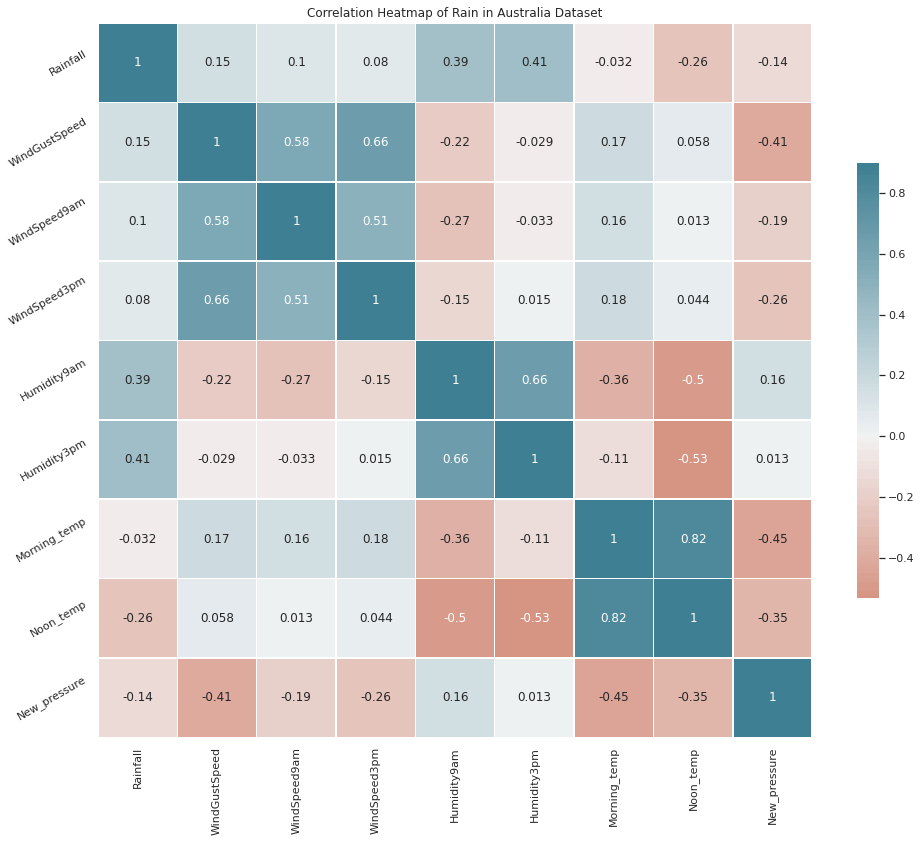

In [46]:
plt.figure(figsize=(16,16))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(temp_df.corr(), annot=True,vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},cmap=sns.diverging_palette(20, 220, n=200))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

## **Checking Multicollinearity using VIF**

In [47]:
def vif(Z3):
  vif_data = pd.DataFrame()
  vif_data["feature"] = Z3.columns
  vif_data["VIF"] = [variance_inflation_factor(np.array(Z3), i)
  for i in range(len(Z3.columns))]
  return vif_data

In [48]:
vif_df=vif(temp_df)
vif_df.sort_values(by=['VIF'],ascending=False)

feature       VIF
7      Noon_temp  9.123772
6   Morning_temp  7.450201
5    Humidity3pm  4.335327
4    Humidity9am  2.434643
1  WindGustSpeed  2.360426
3   WindSpeed3pm  1.884535
2   WindSpeed9am  1.742059
8   New_pressure  1.483055
0       Rainfall  1.047792

In [49]:
#function to remove columns with high VIF more than 5 on each iteration
def vif_func(X,thresh=10):

  var_names=X.columns
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  Y=X
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
  vif_max=vif_data['VIF'].max()
  vif_features_max=vif_data[vif_data['VIF']==vif_max]['feature']
  if(vif_max<=thresh):
    print("\nAll Variables have VIF <",thresh," Max VIF is",vif_max)
    return var_names
  else:
      while(vif_max>thresh):
        X=X.drop(vif_features_max, inplace=False, axis=1)
        print("\n Dropped Features\n",list(vif_features_max),"\n Max VIF was → ",vif_max)
        var_names=X.columns
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i)
        for i in range(len(X.columns))]
        vif_max=vif_data['VIF'].max()
        vif_features_max=vif_data[vif_data['VIF']==vif_max]['feature']
        if(vif_max<=thresh):
          print("\nAll Variables have VIF <",thresh," Max VIF is ",vif_max)
          break
      return X.columns

In [50]:
vif_func(temp_df,5)


 Dropped Features
 ['Noon_temp'] 
 Max VIF was →  9.123771535454706

All Variables have VIF < 5  Max VIF is  2.3586686840698325


Index(['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Morning_temp', 'New_pressure'],
      dtype='object')

In [51]:
#Dropping 'Noon_temp' column 
craw_df.drop(['Noon_temp'], axis=1,inplace=True)
temp_df.drop(['Noon_temp'], axis=1,inplace=True)

temp_df

Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0      -0.206727       0.296762      0.676275      0.610232     0.113996   
1      -0.277606       0.296762     -1.124274      0.382909    -1.302317   
2      -0.277606       0.444058      0.563741      0.837555    -1.617054   
3      -0.277606      -1.176193     -0.336533     -1.094689    -1.249861   
4      -0.159474       0.075819     -0.786671      0.155586     0.691012   
...          ...            ...           ...           ...          ...   
145454 -0.277606      -0.660658      0.113604     -0.640043    -0.515477   
145455 -0.277606      -0.660658     -0.111465     -0.867366    -0.935125   
145456 -0.277606      -1.323488     -0.111465     -1.094689    -0.672845   
145457 -0.277606      -0.218772     -0.561602     -1.094689    -0.830213   
145458 -0.277606      -0.881602     -0.111465     -1.322011    -0.935125   

        Humidity3pm  Morning_temp  New_pressure  
0         -1.415339      0.088177     -1.280330  
1         -1.271158     -0.357200     -1.026495  
2         -1.030857      0.364717     -1.173657  
3         -1.703700     -0.147386     -0.178527  
4         -0.886677      0.477570     -1.140345  
...             ...           ...           ...  
145454    -1.175038     -1.262074      0.918115  
145455    -1.319218     -1.262849      0.847115  
145456    -1.463399     -1.138811      0.684420  
145457    -1.319218     -0.875117      0.345024  
145458    -1.319218     -0.487607      0.211104  

[140787 rows x 8 columns]

In [52]:
num_features=[column_name for column_name in craw_df.columns if craw_df[column_name].dtype == 'float64' ]

raw_df['Morning_temp']=morning_temp
raw_df['New_pressure'] = new_pressure
raw_df.drop(['MinTemp','Temp9am','MaxTemp','Temp3pm','Pressure9am','Pressure3pm'],inplace= True,axis=1)

raw_df[num_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Rainfall       140787 non-null  float64
 1   WindGustSpeed  140787 non-null  float64
 2   WindSpeed9am   140787 non-null  float64
 3   WindSpeed3pm   140787 non-null  float64
 4   Humidity9am    140787 non-null  float64
 5   Humidity3pm    140787 non-null  float64
 6   Morning_temp   140787 non-null  float64
 7   New_pressure   140787 non-null  float64
dtypes: float64(8)
memory usage: 13.7 MB


## **Exporting data file to csv to perform Stepwise Variable Selection on R**

In [53]:
from google.colab import files
raw_df.to_csv('aus_data.csv')
# files.download("aus_data.csv")

In [54]:
#best variables selected using Stepwise Variable Selection

best_var=['Location', 'Rainfall', 'WindGustSpeed', 'WindDir9am', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
         'Humidity3pm', 'RainToday', 'Year', 'Month','Morning_temp', 'New_pressure']

We started with 22 variables and finally choosen best 13 varibales to fit the model.



---



# ***6. Train-Test Split*** ✅

In [55]:
#splitting dataset into X(explanatory) and Y(target variable)
X = raw_df[best_var] 
y = raw_df['RainTomorrow']

## **Oversampling using SMOTE to deal with Imbalanced Data**

In [56]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify=y)
X_train.shape, X_test.shape

((112629, 13), (28158, 13))

# ***7. Model Training and Accuracy Check*** ✅

## **i)  Using Logistic Regression**





In [57]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='liblinear')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          scoring='f1').fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))



<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Scoring for different class weights')

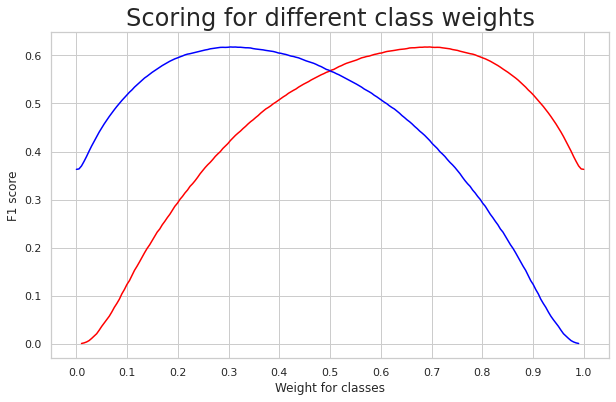

In [58]:
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight1': (1- weights)})
sns.lineplot(weigh_data['weight1'], weigh_data['score'],color='red')
sns.lineplot(1-weigh_data['weight1'], weigh_data['score'],color='blue')
plt.xlabel('Weight for classes')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [59]:
print(gridsearch.best_params_)

{'class_weight': {0: 0.3034673366834171, 1: 0.6965326633165829}}


This best params value will only increase F1 score in case of one class and decrease for the other. So, we,ll see the intersection point of the two curves.

In [60]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0, class_weight={0:0.3034673366834171,1:0.6965326633165829})

In [61]:
# fit the model
logreg.fit(X_train,y_train)
ypred_lr=logreg.predict(X_test)

#Accuracy check on training and testing dataset
from sklearn import metrics

#Accuracy check on training and testing dataset
print("Model accuracy score for Random Forest Classifier: \nTrain set Accuracy: ", metrics.accuracy_score(y_train, logreg.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, ypred_lr))

Model accuracy score for Random Forest Classifier: 
Train set Accuracy:  0.8172495538449245
Test set Accuracy:  0.8165352652887279


In [62]:
def summary_stat(y_pred):
  cm=confusion_matrix(y_test, y_pred)
  n=cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]
  print("Percentage of misclassification = {0:0.2f}%".format((cm[0,1]+cm[1,0])/n*100))
  print("Senstivity rate/True positive rate/Recall is = {0:0.2f}".format((cm[1,1]/(cm[1,1]+cm[0,1]))))
  print("Specificity rate/True negative rate is = {0:0.2f}".format((cm[0,0]/(cm[1,0]+cm[0,0]))))


In [63]:
print('LOGISTIC REGRESSION \n')
summary_stat(ypred_lr)

LOGISTIC REGRESSION 

Percentage of misclassification = 18.35%
Senstivity rate/True positive rate/Recall is = 0.58
Specificity rate/True negative rate is = 0.90


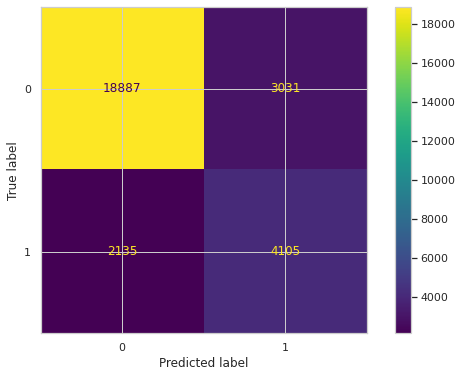

In [64]:
###Confusion Matrix for LOGISTIC REGRESSION
plot_confusion_matrix(logreg,X_test,y_test)

Text(0.5, 0, 'False Positive Rate')

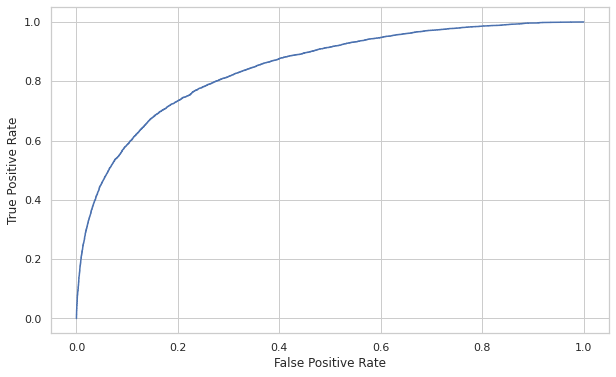

In [65]:
#ROC curve
ypred_lr_prob=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,ypred_lr_prob)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [66]:
auc=metrics.roc_auc_score(y_test,ypred_lr_prob)
auc

0.8475414445392033

In [67]:
print("F1 score is = {0:0.2f}".format(f1_score(y_test,ypred_lr)))

F1 score is = 0.61


In [68]:
summary=pd.DataFrame(columns=["model type","Train Acc","Test Acc","f1"])
summary=summary.append({"model type":"Logistic Regression","Train Acc":0.817,"Test Acc":0.816,"Senstivity":0.58,"f1":0.61},ignore_index=True)
summary

model type  Train Acc  Test Acc    f1  Senstivity
0  Logistic Regression      0.817     0.816  0.61        0.58

### **SMOTE**

In [69]:
#splitting dataset into X(explanatory) and Y(target variable)
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [70]:
# fit the model
logreg.fit(X_train_smote,y_train_smote)
ypred_lr_smote=logreg.predict(X_test)

#Accuracy check on training and testing dataset
print("Model accuracy score for Random Forest Classifier: \nTrain set Accuracy: ", metrics.accuracy_score(y_train_smote, logreg.predict(X_train_smote)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, ypred_lr))

print('LOGISTIC REGRESSION with SMOTE\n')
summary_stat(ypred_lr_smote)

Model accuracy score for Random Forest Classifier: 
Train set Accuracy:  0.7577736460281973
Test set Accuracy:  0.8165352652887279
LOGISTIC REGRESSION with SMOTE

Percentage of misclassification = 33.07%
Senstivity rate/True positive rate/Recall is = 0.39
Specificity rate/True negative rate is = 0.94


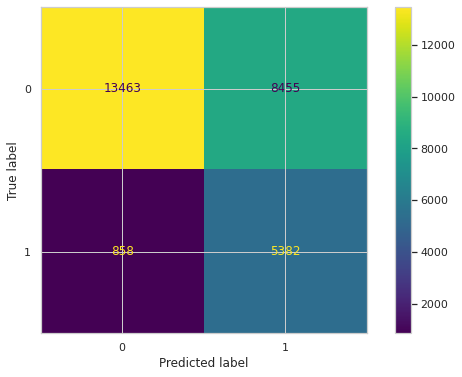

In [71]:
###Confusion Matrix for LOGISTIC REGRESSION
plot_confusion_matrix(logreg,X_test,y_test)

In [72]:
print("F1 score is = {0:0.2f}".format(f1_score(y_test,ypred_lr_smote)))

F1 score is = 0.54


In [73]:
summary=summary.append({"model type":"Logistic Regression with SMOTE","Train Acc":0.757,"Test Acc":0.816,"Senstivity":0.39,"f1":0.54},ignore_index=True)
summary

model type  Train Acc  Test Acc    f1  Senstivity
0             Logistic Regression      0.817     0.816  0.61        0.58
1  Logistic Regression with SMOTE      0.757     0.816  0.54        0.39

## **ii) Using Random Forest Classifer**

In [74]:
X_train_rf, X_val, y_train_rf, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0,stratify=y_train)
X_train_rf.shape, X_val.shape
#splitting dataset into X(explanatory) and Y(target variable)
oversample = SMOTE()
X_train_rf, y_train_rf = oversample.fit_resample(X_train_rf, y_train_rf)


In [91]:
max_depths = np.linspace(1, 21, 11, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
  rf=RandomForestClassifier(max_depth=max_depth)
  rf.fit(X_train_rf, y_train_rf)
  train_preds_rf = rf.predict(X_train_rf)
  from sklearn.metrics import auc
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_rf, train_preds_rf)
  roc_auc_train = auc(false_positive_rate, true_positive_rate)
  # Add auc score to previous train results
  train_results.append(roc_auc_train)
  y_pred_rf = rf.predict(X_val)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred_rf)
  roc_auc_val = auc(false_positive_rate, true_positive_rate)
  # Add auc score to previous test results
  test_results.append(roc_auc_val)



In [94]:
train_results.index(max(train_results))

10

In [95]:
print(max_depths[10])

21.0


In [78]:
n_ests = np.linspace( 1,201, 26, endpoint=True)
n_ests

array([  1.,   9.,  17.,  25.,  33.,  41.,  49.,  57.,  65.,  73.,  81.,
        89.,  97., 105., 113., 121., 129., 137., 145., 153., 161., 169.,
       177., 185., 193., 201.])

In [98]:
n_ests = np.linspace( 1,201, 26, endpoint=True)
train_results = []
test_results = []
for n_est in n_ests:
  rf=RandomForestClassifier(n_estimators=int(n_est),max_depth=21,class_weight={0:0.3034673366834171,1:0.6965326633165829})
  rf.fit(X_train_rf, y_train_rf)
  train_preds_rf = rf.predict(X_train_rf)
  from sklearn.metrics import auc
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_rf, train_preds_rf)
  roc_auc_train = auc(false_positive_rate, true_positive_rate)
  # Add auc score to previous train results
  train_results.append(roc_auc_train)
  y_pred_rf = rf.predict(X_val)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred_rf)
  roc_auc_test = auc(false_positive_rate, true_positive_rate)
  # Add auc score to previous test results
  test_results.append(roc_auc_test)


In [99]:
train_results.index(max(train_results))

10

In [100]:
print(n_ests[21])

169.0


In [101]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
classifier=RandomForestClassifier(n_estimators=137,max_depth=21)

# fit the model
classifier.fit(X_train,y_train)
ypred_rf=classifier.predict(X_test)

#Accuracy check on training and testing dataset
print("Model accuracy score for Random Forest Classifier: \nTrain set Accuracy: ", metrics.accuracy_score(y_train, classifier.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, ypred_rf))

Model accuracy score for Random Forest Classifier: 
Train set Accuracy:  0.9821981905193157
Test set Accuracy:  0.8527594289367143


In [102]:
summary_stat(ypred_rf)

Percentage of misclassification = 14.72%
Senstivity rate/True positive rate/Recall is = 0.76
Specificity rate/True negative rate is = 0.87


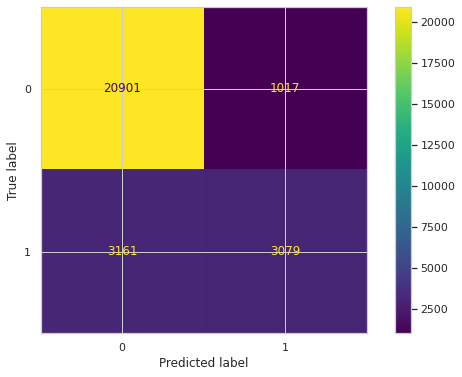

In [84]:
###Confusion Matrix for RANDOM FOREST CLASSIFIER
plot_confusion_matrix(classifier,X_test,y_test)

In [103]:
print(f1_score(y_test,ypred_rf))

0.5978661493695442


In [104]:
summary=summary.append({"model type":"Random Forest","Train Acc":0.98,"Test Acc":0.85,"Senstivity": 0.76,"f1":f1_score(y_test,ypred_rf)},ignore_index=True)
summary

model type  Train Acc  Test Acc        f1  Senstivity
0             Logistic Regression      0.817     0.816  0.610000        0.58
1  Logistic Regression with SMOTE      0.757     0.816  0.540000        0.39
2                   Random Forest      0.980     0.850  0.628000        0.76
3                   Random Forest      0.980     0.850  0.597866        0.76

Text(0.5, 0, 'False Positive Rate')

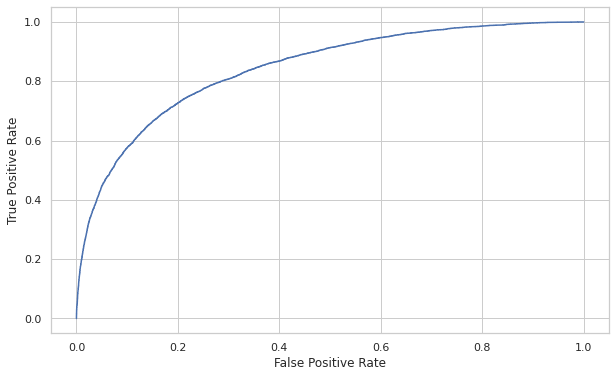

In [87]:
#ROC curve
ypred_rf_prob=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,ypred_rf_prob)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [88]:
auc=metrics.roc_auc_score(y_test,ypred_rf_prob)
auc

0.8430951224669572

Since the accuracy of Random Forest Classifier is quite better than Logistic regression hence we can say that our data is not linearly separable.

## **iii) Using KNN Classifier**

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid
params = {'n_neighbors' : list(range(3,20))}

In [106]:
# Instantiating the RandomizedSearchCV object
knn = KNeighborsClassifier()

knn_cv = RandomizedSearchCV(knn, params, cv = 5)
knn_cv.fit(X_train, y_train)

ypred_knn=knn_cv.predict(X_test)

In [107]:
# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

#Accuracy check on training and testing dataset
print("Model accuracy score for KNN Classifier: \nTrain set Accuracy: ", metrics.accuracy_score(y_train, knn_cv.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, ypred_knn))

Tuned KNN Parameters: {'n_neighbors': 11}
Best score is 0.8306919282224422
Model accuracy score for KNN Classifier: 
Train set Accuracy:  0.8543092809134415
Test set Accuracy:  0.8295688614248171


In [108]:
print('KNN CLASSIFIER \n')
summary_stat(ypred_knn)

KNN CLASSIFIER 

Percentage of misclassification = 17.04%
Senstivity rate/True positive rate/Recall is = 0.74
Specificity rate/True negative rate is = 0.84


In [109]:
print(f1_score(y_test,ypred_knn))

0.4825876010781671


In [110]:
summary=summary.append({"model type":"KNN","Train Acc":0.854,"Test Acc":0.829,"Senstivity": 0.74,"f1":0.582},ignore_index=True)
summary

model type  Train Acc  Test Acc        f1  Senstivity
0             Logistic Regression      0.817     0.816  0.610000        0.58
1  Logistic Regression with SMOTE      0.757     0.816  0.540000        0.39
2                   Random Forest      0.980     0.850  0.628000        0.76
3                   Random Forest      0.980     0.850  0.597866        0.76
4                             KNN      0.854     0.829  0.582000        0.74

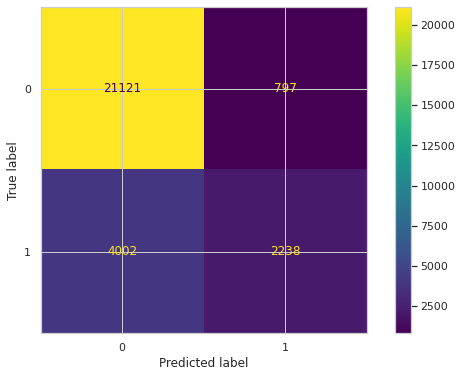

In [111]:
###Confusion Matrix for KNN CLASSIFIER
plot_confusion_matrix(knn_cv,X_test,y_test)

In [112]:
summary=pd.melt(summary,id_vars=["model type"],value_name="metrics")

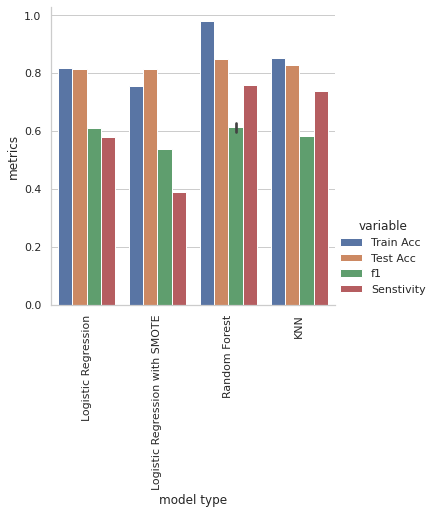

In [113]:
sns.catplot(x="model type",y="metrics",hue="variable",kind="bar",data=summary)
plt.xticks(rotation=90)
plt.show()

Therefore, Random Forest performs the best.